# Title : Sign to Speech/Text Converter

## Aim :The main objective is to translate sign language to text/speech. The framework provides a helping-hand for speech-impaired to communicate with the rest of the world using sign language

### Prerequisites:
  1) Python.
  
  2) IDE(Jupyter, Pycharm,etc).
  
  3) NumPy.
  
  4) CV2 (OpenCV).
  
  5) Tensorflow.
  
  6) Keras.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import tensorflow as tf
from tensorflow import keras
import glob
from PIL import Image
import keras_tuner as Tuner

In [2]:
labels= []
data = []
classes = 36
current_path = os.getcwd()

In [3]:
imdir='C:/Users/BhanuYadav/Desktop/PythonProject/Sign_to_Text_or_Speech_Converter/train_dataset/0/'
ext = ['jpeg']
files = []
[files.extend(glob.glob(imdir + '*.' + e)) for e in ext]
images1 = [cv2.imread(file) for file in files]


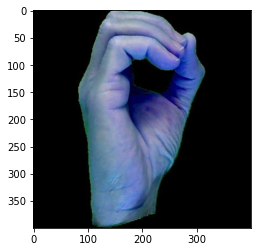

In [4]:
plt.imshow(images1[0])
plt.show()

In [5]:
images1[0].shape

(400, 400, 3)

In [6]:
for i in range(classes):
    path = os.path.join(current_path,"train_dataset",str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '\\' + a)
            image = image.resize((400,400))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

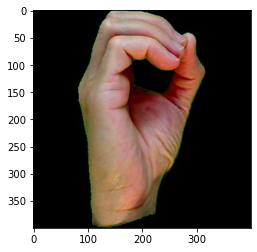

In [7]:
plt.imshow(data[0])
plt.show()

In [8]:
# Convert List to Numpy Array
labels = np.array(labels)
data = np.array(data)

In [9]:
print(data.shape,labels.shape)

(2515, 400, 400, 3) (2515,)


In [10]:
# Creating training and testing data using train test split
from sklearn.model_selection import train_test_split

X_train , X_test, Y_train , Y_test = train_test_split(data,labels,test_size=0.4,random_state=40)

In [11]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(1509, 400, 400, 3) (1006, 400, 400, 3) (1509,) (1006,)


In [12]:
# Converting the labels into onehot coding
from tensorflow.keras.utils import to_categorical

Y_train = to_categorical(Y_train,36)
Y_test = to_categorical(Y_test,36)

# Base Model

In [13]:
Model = keras.models.Sequential()
Model.add(keras.layers.Conv2D(filters=32,strides=2,padding='same',kernel_size=3,activation='relu',input_shape=(400,400,3)))
Model.add(keras.layers.MaxPooling2D(pool_size=2,padding='valid'))
Model.add(keras.layers.Conv2D(filters=32,strides=2,padding='same',kernel_size=3,activation='relu'))
Model.add(keras.layers.MaxPooling2D(pool_size=2,padding='valid'))
Model.add(keras.layers.Flatten())
Model.add(keras.layers.Dense(units=128,activation='relu'))
Model.add(keras.layers.Dropout(0.40))
Model.add(keras.layers.Dense(units=96,activation='relu'))
Model.add(keras.layers.Dropout(0.40))
Model.add(keras.layers.Dense(units=64,activation='relu'))
Model.add(keras.layers.Dense(units=36,activation='softmax'))

In [14]:
Model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [15]:
Model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 200, 200, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 100, 100, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 25, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 20000)             0         
                                                                 
 dense (Dense)               (None, 128)               2

In [16]:
History = Model.fit(X_train,Y_train,epochs=15,validation_data=(X_test,Y_test))

Epoch 1/15
48/48 [==============================] - 20s 416ms/step - loss: 6.6718 - accuracy: 0.0510 - val_loss: 3.2334 - val_accuracy: 0.1720
Epoch 2/15
48/48 [==============================] - 20s 419ms/step - loss: 3.1770 - accuracy: 0.1359 - val_loss: 2.7998 - val_accuracy: 0.3121
Epoch 3/15
48/48 [==============================] - 20s 416ms/step - loss: 2.7776 - accuracy: 0.2512 - val_loss: 2.1279 - val_accuracy: 0.4920
Epoch 4/15
48/48 [==============================] - 20s 417ms/step - loss: 2.3716 - accuracy: 0.3393 - val_loss: 1.7523 - val_accuracy: 0.5716
Epoch 5/15
48/48 [==============================] - 20s 418ms/step - loss: 1.9484 - accuracy: 0.4433 - val_loss: 1.1841 - val_accuracy: 0.6988
Epoch 6/15
48/48 [==============================] - 20s 420ms/step - loss: 1.6428 - accuracy: 0.5136 - val_loss: 0.9666 - val_accuracy: 0.7684
Epoch 7/15
48/48 [==============================] - 20s 416ms/step - loss: 1.4694 - accuracy: 0.5679 - val_loss: 0.8480 - val_accuracy: 0.8191

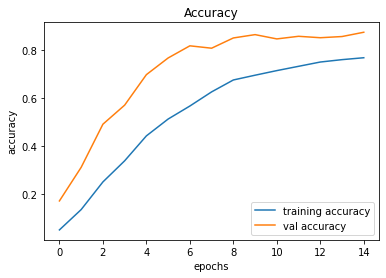

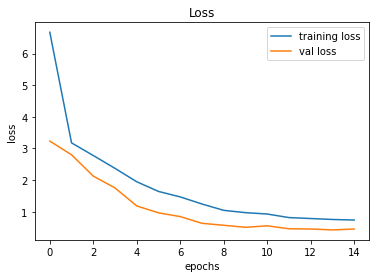

In [17]:
plt.figure(0)
plt.plot(History.history['accuracy'], label='training accuracy')
plt.plot(History.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.figure(1)
plt.plot(History.history['loss'], label='training loss')
plt.plot(History.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [18]:
pred = Model.predict(X_test)

from sklearn.metrics import r2_score

print(np.round(r2_score(Y_test,pred)*100,0))

80.0


# HyperTuned Model

In [19]:
# Building Model

def Build_Model(hp):
    Model = keras.models.Sequential()
    Model.add(keras.layers.Conv2D(filters=hp.Int("Filter_Size1" , min_value=32,max_value=512,step=32),strides=2,padding='same',kernel_size=3,activation='relu',input_shape=(400,400,3)))
    Model.add(keras.layers.MaxPooling2D(pool_size=2,padding='valid'))
    Model.add(keras.layers.Conv2D(filters=hp.Int("Filter_Size2" , min_value=32,max_value=512,step=32),strides=2,padding='same',kernel_size=3,activation='relu'))
    Model.add(keras.layers.MaxPooling2D(pool_size=2,padding='valid'))
    Model.add(keras.layers.Flatten())
    Model.add(keras.layers.Dense(units=hp.Int('dense_1_units', min_value=32, max_value=512),activation='relu'))
    Model.add(keras.layers.Dropout(0.40))
    Model.add(keras.layers.Dense(units=hp.Int('dense_2_units', min_value=32, max_value=512),activation='relu'))
    Model.add(keras.layers.Dropout(0.40))
    Model.add(keras.layers.Dense(units=hp.Int('dense_3_units', min_value=32, max_value=512),activation='relu'))
    Model.add(keras.layers.Dense(units=36,activation='softmax'))
    learning_rate=hp.Float("leraning_rate",min_value=1e-4,max_value=1e-2,sampling="log")
    Model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate),loss="categorical_crossentropy",metrics=["accuracy"])
    return Model

In [20]:
from keras_tuner import RandomSearch

tunner = RandomSearch(Build_Model,objective='val_accuracy',max_trials=5,directory='output',project_name="Sign_to_Speech",overwrite=True)

In [21]:
tunner.search(X_train,Y_train,epochs=15,validation_data=(X_test,Y_test))

Trial 5 Complete [02h 34m 12s]
val_accuracy: 0.8996024131774902

Best val_accuracy So Far: 0.9324055910110474
Total elapsed time: 07h 35m 22s
INFO:tensorflow:Oracle triggered exit


In [22]:
Model_tuned = tunner.get_best_models(num_models=1)[0]

In [23]:
Best_Parameters = tunner.get_best_hyperparameters(2)

In [24]:
Model_Tuned = Build_Model(Best_Parameters[0])

In [25]:
History_1 = Model_Tuned.fit(X_train,Y_train,epochs=20,batch_size=32,validation_data=(X_test,Y_test))

Epoch 1/20
48/48 [==============================] - 553s 12s/step - loss: 9.2728 - accuracy: 0.1259 - val_loss: 1.6278 - val_accuracy: 0.6272
Epoch 2/20
48/48 [==============================] - 544s 11s/step - loss: 1.8132 - accuracy: 0.4798 - val_loss: 0.7917 - val_accuracy: 0.7734
Epoch 3/20
48/48 [==============================] - 558s 12s/step - loss: 1.0854 - accuracy: 0.6786 - val_loss: 0.5141 - val_accuracy: 0.8638
Epoch 4/20
48/48 [==============================] - 526s 11s/step - loss: 0.7584 - accuracy: 0.7760 - val_loss: 0.3794 - val_accuracy: 0.8857
Epoch 5/20
48/48 [==============================] - 541s 11s/step - loss: 0.5563 - accuracy: 0.8244 - val_loss: 0.3652 - val_accuracy: 0.8837
Epoch 6/20
48/48 [==============================] - 617s 13s/step - loss: 0.4325 - accuracy: 0.8608 - val_loss: 0.3474 - val_accuracy: 0.9036
Epoch 7/20
48/48 [==============================] - 627s 13s/step - loss: 0.3375 - accuracy: 0.8933 - val_loss: 0.3288 - val_accuracy: 0.9085
Epoch 

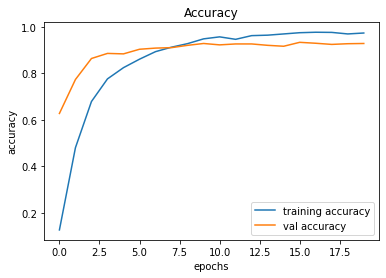

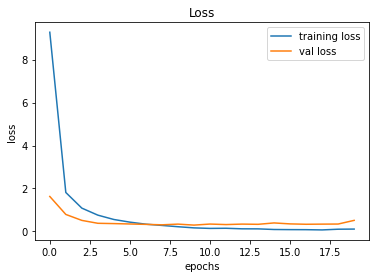

In [26]:
plt.figure(0)
plt.plot(History_1.history['accuracy'], label='training accuracy')
plt.plot(History_1.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.figure(1)
plt.plot(History_1.history['loss'], label='training loss')
plt.plot(History_1.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [27]:
pred = Model_Tuned.predict(X_test)

from sklearn.metrics import r2_score

print(np.round(r2_score(Y_test,pred)*100,0))

86.0


In [28]:
score = Model_Tuned.evaluate(X_test,Y_test,verbose=0)

In [29]:
print(score)

[0.5153123140335083, 0.9284294247627258]



# Saving Model

In [31]:
Model_Tuned.save('Sign_To_Speech.h5')